In [1]:
#-Intregrasi colab dan drive-

from google.colab import drive
drive.mount('/content/drive')

#-Install lib yang dibutuhkan-
!pip install matplotlib --upgrade
!pip install swifter
!pip install Sastrawi
!pip install googletrans==3.1.0a0
from googletrans import Translator

import pandas as pd
import numpy as np

from IPython.display import display
import matplotlib.pyplot as plt

#-Modify-
import regex as re

import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')

import Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

import swifter
import ast

import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

#-Model-
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, confusion_matrix, classification_report

#-Asess-
import seaborn as sns
import pickle

#-Wordcloud-
import wordcloud
from wordcloud import STOPWORDS
from wordcloud import WordCloud
import PIL
from PIL import Image

Mounted at /content/drive
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 21.7 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16507 sha256=0dcb0157bed6f20f6cb3393557799d08922af6e59cce5b28f1a1965bb90d3323
  Stored in directory: /root/.cache/pip/wheels/e4/cf/51/0904952972ee2c7aa3709437065278dc534ec1b8d2ad41b443
Successfully built swifter
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## **MODIFY**

In [2]:
#define dataframe
data_ganjar = pd.read_excel('/content/drive/My Drive/Skripsi/Thesis/Skripsi Saya/text processing/ganjarFile/GanjarRMExcel.xlsx')
data_ganjar

,publishedAt,authorDisplayName,textDisplay,likeCount,sentimen,platform,capresName
0,2023-09-22T08:50:47Z,Hoar Fegary,Mantap cara berfikirnya pak,0,Positif,Youtube,GanjarPranowo
1,2023-09-30T07:05:30Z,Uut Permata,Keras kepala g mau di kritik,0,Negatif,Youtube,GanjarPranowo
2,2023-09-22T07:10:49Z,Zayn Savero,"Semua pertanyaan bisa dijawab semua, hebat",0,Positif,Youtube,GanjarPranowo
3,2023-09-22T01:02:12Z,Lenovo 77,"Tegas, lantang, cerdas, di dukung smua dgn fak...",10,Positif,Youtube,GanjarPranowo
4,2023-09-22T05:57:09Z,Susi Effendi,"gagasan pak Ganjar nyataa , gak muter-muter ja...",0,Positif,Youtube,GanjarPranowo
...,...,...,...,...,...,...,...
895,2023-09-22T14:48:24Z,sarah cameron,dukung terus pak ganjar,1,Positif,Youtube,GanjarPranowo
896,2023-09-22T13:46:09Z,IGUSTINGURAH SUSILA,Luar biasa.Ganjar Pranowo❤❤❤❤❤,0,Positif,Youtube,GanjarPranowo
897,2023-09-23T01:43:15Z,Ahmad Nukman,"Yg jls pak ganjar gubernur jateng 2 periode, p...",0,Positif,Youtube,GanjarPranowo
898,2023-09-22T23:02:46Z,sandra kan,Menurutku sih ini pembahasan gagasan yang pali...,0,Positif,Youtube,GanjarPranowo


**Atribut elimination**

In [3]:
data_ganjar = data_ganjar[
    ['textDisplay','sentimen']
]
data_ganjar

,textDisplay,sentimen
0,Mantap cara berfikirnya pak,Positif
1,Keras kepala g mau di kritik,Negatif
2,"Semua pertanyaan bisa dijawab semua, hebat",Positif
3,"Tegas, lantang, cerdas, di dukung smua dgn fak...",Positif
4,"gagasan pak Ganjar nyataa , gak muter-muter ja...",Positif
...,...,...
895,dukung terus pak ganjar,Positif
896,Luar biasa.Ganjar Pranowo❤❤❤❤❤,Positif
897,"Yg jls pak ganjar gubernur jateng 2 periode, p...",Positif
898,Menurutku sih ini pembahasan gagasan yang pali...,Positif


**text preprocessing**

In [4]:
#CASE_FOLDING

# Definisikan fungsi case folding
def caseFolding(content):
    return content.lower()

In [5]:
#CLEANING

#regex pattern

#--Hapus karakter diluar huruf dan spasi--
clean_sym = re.compile(r'[^a-zA-Z\s]')
#--Hapus angka--
clean_num = re.compile(r'\d+')
#--Hapus spasi double--
clean_dblspc = re.compile(r'\s+')
#--Hapus link HTML--
clean_link = re.compile(r'<a\s+href="[^"]*"></a>')
#--Hapus tag HTML--
clean_html = re.compile(r'<.*?>')

#definisikan fungsi cleaning
def cleaning(content):
    content = clean_sym.sub(' ', content)
    content = clean_num.sub(' ', content)
    content = clean_dblspc.sub(' ', content)
    content = clean_link.sub(' ', content)
    content = clean_html.sub(' ', content)
    return content

In [6]:
#TOKENIZING

#definisikan fungsi tokenize
def tokenize(content):
    return word_tokenize(content)

In [7]:
#NORMALIZE

#read kamus norm
norm_words = pd.read_excel('/content/drive/My Drive/Skripsi/Thesis/Skripsi Saya/text processing/ganjarFile/norm.xlsx')

In [8]:
#DICTIONARY

norm_word_dict = {}

#mengganti kata sesuai kamus norm
for index, row in norm_words.iterrows():
    if row[0] not in norm_word_dict:
        norm_word_dict[row[0]] = row[1]

#definisikan fungsi normalize
def normalize(content):
    return [
        norm_word_dict[word] if word in norm_word_dict else word for word in content
    ]

In [9]:
#STOPWORDS

nltk_stopwords = stopwords.words('indonesian')
txt_stopwords = open(
    '/content/drive/My Drive/Skripsi/Thesis/Skripsi Saya/text processing/ganjarFile/stopwordGanjarFinal.txt', 'r'
).read().split()

In [10]:
all_stopword = nltk_stopwords + txt_stopwords #stopword NLTK dan stopword sesuai paslon
all_stopword = set(all_stopword)

#definisikan fungsi stopword removal
def stopword_removal(content):
    return [word for word in content if word not in all_stopword]

In [11]:
data_ganjar.insert(2, 'loweredNew', data_ganjar.iloc[:,0].apply(caseFolding))
data_ganjar.insert(3, 'cleanedNew', data_ganjar.iloc[:,2].apply(cleaning))
data_ganjar.insert(4, 'tokenizedNew', data_ganjar.iloc[:,3].apply(tokenize))
data_ganjar.insert(5, 'normalized', data_ganjar.iloc[:,4].apply(normalize))
data_ganjar.insert(6, 'stopword_removed', data_ganjar.iloc[:,5].apply(stopword_removal))
data_ganjar

,textDisplay,sentimen,loweredNew,cleanedNew,tokenizedNew,normalized,stopword_removed
0,Mantap cara berfikirnya pak,Positif,mantap cara berfikirnya pak,mantap cara berfikirnya pak,"[mantap, cara, berfikirnya, pak]","[mantap, cara, berfikirnya, bapak]","[mantap, berfikirnya]"
1,Keras kepala g mau di kritik,Negatif,keras kepala g mau di kritik,keras kepala g mau di kritik,"[keras, kepala, g, mau, di, kritik]","[keras, kepala, enggak, mau, di, kritik]","[keras, kepala, kritik]"
2,"Semua pertanyaan bisa dijawab semua, hebat",Positif,"semua pertanyaan bisa dijawab semua, hebat",semua pertanyaan bisa dijawab semua hebat,"[semua, pertanyaan, bisa, dijawab, semua, hebat]","[semua, pertanyaan, bisa, dijawab, semua, hebat]",[hebat]
3,"Tegas, lantang, cerdas, di dukung smua dgn fak...",Positif,"tegas, lantang, cerdas, di dukung smua dgn fak...",tegas lantang cerdas di dukung smua dgn fakta ...,"[tegas, lantang, cerdas, di, dukung, smua, dgn...","[tegas, lantang, cerdas, di, dukung, semua, de...","[lantang, cerdas, dukung, fakta, negeri, padam..."
4,"gagasan pak Ganjar nyataa , gak muter-muter ja...",Positif,"gagasan pak ganjar nyataa , gak muter-muter ja...",gagasan pak ganjar nyataa gak muter muter jawa...,"[gagasan, pak, ganjar, nyataa, gak, muter, mut...","[gagasan, bapak, ganjar, nyata, tidak, putar, ...","[gagasan, ganjar, nyata, putar, putar]"
...,...,...,...,...,...,...,...
895,dukung terus pak ganjar,Positif,dukung terus pak ganjar,dukung terus pak ganjar,"[dukung, terus, pak, ganjar]","[dukung, terus, bapak, ganjar]","[dukung, ganjar]"
896,Luar biasa.Ganjar Pranowo❤❤❤❤❤,Positif,luar biasa.ganjar pranowo❤❤❤❤❤,luar biasa ganjar pranowo,"[luar, biasa, ganjar, pranowo]","[luar, biasa, ganjar, ganjar]","[ganjar, ganjar]"
897,"Yg jls pak ganjar gubernur jateng 2 periode, p...",Positif,"yg jls pak ganjar gubernur jateng 2 periode, p...",yg jls pak ganjar gubernur jateng periode pak ...,"[yg, jls, pak, ganjar, gubernur, jateng, perio...","[yang, jelas, bapak, ganjar, gubernur, jateng,...","[ganjar, gubernur, periode, periode, kabinet, ..."
898,Menurutku sih ini pembahasan gagasan yang pali...,Positif,menurutku sih ini pembahasan gagasan yang pali...,menurutku sih ini pembahasan gagasan yang pali...,"[menurutku, sih, ini, pembahasan, gagasan, yan...","[menurutku, sih, ini, pembahasan, gagasan, yan...","[menurutku, sih, pembahasan, gagasan, seru]"


In [12]:
#STEMMING

factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [13]:
#definisikan fungsi stemming
def stemming(word):
    return stemmer.stem(word)

word_dict = {}

for content in data_ganjar['stopword_removed']:
    for word in content:
        word_dict[word] = ' '

print(len(word_dict))
print('============================')
for word in word_dict:
    word_dict[word] = stemming(word)
    print(word,':' ,word_dict[word])


1779
mantap : mantap
berfikirnya : berfikirnya
keras : keras
kepala : kepala
kritik : kritik
hebat : hebat
lantang : lantang
cerdas : cerdas
dukung : dukung
fakta : fakta
negeri : negeri
padamu : pada
ganjar : ganjar
gagasan : gagas
nyata : nyata
putar : putar
solutif : solutif
sih : sih
orang : orang
kemampuan : mampu
kerja : kerja
tolong : tolong
bantu : bantu
sertifikasi : sertifikasi
berkompetisi : kompetisi
global : global
penasaran : penasaran
visi : visi
misi : misi
gratis : gratis
sekolah : sekolah
kuliah : kuliah
biar : biar
menurutku : turut
memilih : pilih
presiden : presiden
salut : salut
iya : iya
pojokkan : pojok
segitu : segitu
pintar : pintar
akademis : akademis
gak : gak
nasib : nasib
petani : tani
konkret : konkret
swasembada : swasembada
pangan : pangan
kelaparan : lapar
sumber : sumber
daya : daya
dikuasai : asai
tidak,menyambung : tidak sambung
dasar : dasar
partai : partai
kerbau : kerbau
guling : guling
capresnya : capresnya
menghadapi : hadap
lingkungan : lingku

In [14]:
def stemming_content(content):
    return [word_dict[word] for word in content]
data_ganjar.insert(
    7,
    'stemmed',
    data_ganjar.iloc[:,6].swifter.apply(stemming_content)
)

Pandas Apply:   0%|          | 0/900 [00:00<?, ?it/s]

In [15]:
# EXPORT CLEANED
data_ganjar.to_excel('/content/drive/My Drive/Skripsi/Thesis/Skripsi Saya/text processing/ganjarFile/GanjarBeforeCleaning.xlsx', index=False)

In [16]:
# FINAL RESULT AND DROP ANOTHER ATTRIBUTES
data_ganjar.iloc[:,0] = data_ganjar.iloc[:,7]
data_ganjar = data_ganjar[['textDisplay','sentimen',]]
data_ganjar

,textDisplay,sentimen
0,"[mantap, berfikirnya]",Positif
1,"[keras, kepala, kritik]",Negatif
2,[hebat],Positif
3,"[lantang, cerdas, dukung, fakta, negeri, pada,...",Positif
4,"[gagas, ganjar, nyata, putar, putar]",Positif
...,...,...
895,"[dukung, ganjar]",Positif
896,"[ganjar, ganjar]",Positif
897,"[ganjar, gubernur, periode, periode, kabinet, ...",Positif
898,"[turut, sih, bahas, gagas, seru]",Positif


In [17]:
# EXPORT CLEANED
data_ganjar.to_excel('/content/drive/My Drive/Skripsi/Thesis/Skripsi Saya/text processing/ganjarFile/GanjarBeforeMV.xlsx', index=False)

In [18]:
#MISSING VALUE

data_cleanGanjar = pd.read_excel('/content/drive/My Drive/Skripsi/Thesis/Skripsi Saya/text processing/ganjarFile/GanjarBeforeMV.xlsx')

#definisikan fungsi join text list
def join_text_list(texts):
    texts = ast.literal_eval(texts)
    return ' '.join([text for text in texts])

data_cleanGanjar.insert(1,'textDisplay_join', data_cleanGanjar['textDisplay'].apply(join_text_list))

In [19]:
data_cleanGanjar = data_cleanGanjar[data_cleanGanjar['textDisplay_join'] != '' ].reset_index(drop=True)
display(data_cleanGanjar)

data_cleanGanjar.to_excel('/content/drive/My Drive/Skripsi/Thesis/Skripsi Saya/text processing/ganjarFile/GanjarTestPrep.xlsx', index=False)

,textDisplay,textDisplay_join,sentimen
0,"['mantap', 'berfikirnya']",mantap berfikirnya,Positif
1,"['keras', 'kepala', 'kritik']",keras kepala kritik,Negatif
2,['hebat'],hebat,Positif
3,"['lantang', 'cerdas', 'dukung', 'fakta', 'nege...",lantang cerdas dukung fakta negeri pada ganjar,Positif
4,"['gagas', 'ganjar', 'nyata', 'putar', 'putar']",gagas ganjar nyata putar putar,Positif
...,...,...,...
852,"['dukung', 'ganjar']",dukung ganjar,Positif
853,"['ganjar', 'ganjar']",ganjar ganjar,Positif
854,"['ganjar', 'gubernur', 'periode', 'periode', '...",ganjar gubernur periode periode kabinet masyar...,Positif
855,"['turut', 'sih', 'bahas', 'gagas', 'seru']",turut sih bahas gagas seru,Positif


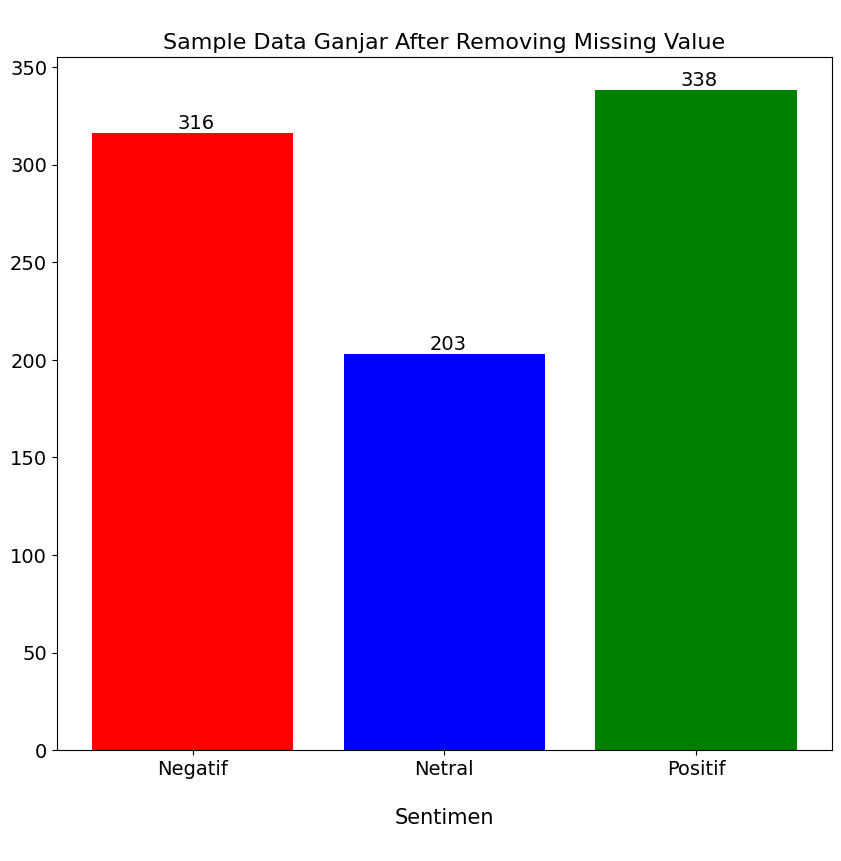

In [20]:
# SAMPEL DATA AFTER MISSING VALUE
x = ['Negatif','Netral','Positif']
y = data_cleanGanjar['sentimen'].value_counts().sort_index()

fig, ax =  plt.subplots(figsize = (10, 9))  #---membuat figure dan axes--
ax.bar(x, y, color=('red','blue','green')) #---membuat bar chart---

#looping bar chart
for bar in ax.patches:
    ax.annotate(str(round(bar.get_height())), (bar.get_x(), bar.get_height())
                 ,ha='center',
                  va='center',
                  size=14,
                  xytext=(75, 7),
                  textcoords='offset points')
plt.title('\nSample Data Ganjar After Removing Missing Value', size=16)
plt.ylim(bottom=0)
plt.xlabel('\nSentimen\n', size=15)
plt.xticks(size=14)
plt.yticks(size=14)
plt.show()

## **MODEL**

In [21]:
#IMPORT DATA TEST PREP

import string

data_modelGanjar = pd.read_excel('/content/drive/My Drive/Skripsi/Thesis/Skripsi Saya/text processing/ganjarFile/GanjarTestPrep.xlsx')
data_modelGanjar

,textDisplay,textDisplay_join,sentimen
0,"['mantap', 'berfikirnya']",mantap berfikirnya,Positif
1,"['keras', 'kepala', 'kritik']",keras kepala kritik,Negatif
2,['hebat'],hebat,Positif
3,"['lantang', 'cerdas', 'dukung', 'fakta', 'nege...",lantang cerdas dukung fakta negeri pada ganjar,Positif
4,"['gagas', 'ganjar', 'nyata', 'putar', 'putar']",gagas ganjar nyata putar putar,Positif
...,...,...,...
852,"['dukung', 'ganjar']",dukung ganjar,Positif
853,"['ganjar', 'ganjar']",ganjar ganjar,Positif
854,"['ganjar', 'gubernur', 'periode', 'periode', '...",ganjar gubernur periode periode kabinet masyar...,Positif
855,"['turut', 'sih', 'bahas', 'gagas', 'seru']",turut sih bahas gagas seru,Positif


In [22]:
# CHANGE DATA TYPES
data_modelGanjar = data_modelGanjar.astype({'textDisplay_join': 'string'})
data_modelGanjar = data_modelGanjar.astype({'sentimen': 'category'})
data_modelGanjar.dtypes

textDisplay                 object
textDisplay_join    string[python]
sentimen                  category
dtype: object

In [23]:
# DIVIDE VARIABLE


x = data_modelGanjar['textDisplay_join']
y = data_modelGanjar['sentimen']

print(x.shape)
print(y.shape)

(857,)
(857,)


In [24]:
# HOW TO KNOW SHAPE TRAIN AND TESTING


x_train, x_test, y_train, y_test = train_test_split(data_modelGanjar['textDisplay_join'], data_modelGanjar['sentimen'],
                                                    test_size = 0.1,
                                                    random_state = 0)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(771,)
(771,)
(86,)
(86,)


In [25]:
#TF IDF PROCESS


tf = TfidfVectorizer(ngram_range=(1, 1)) #--mempertimbangkan hanya unigram--
text_tf = tf.fit_transform(data_modelGanjar['textDisplay_join'].values.astype('U'))
print(text_tf)

h_tfidf = TfidfTransformer()
x_tfidf = h_tfidf.fit_transform(text_tf)
print(x_tfidf)

tfidf_vect =TfidfVectorizer()
vectors = tfidf_vect.fit_transform(data_modelGanjar['textDisplay_join'].values.astype('U'))
feature_names = tfidf_vect.get_feature_names_out()

tfidf_transformer = TfidfTransformer()
x_tfidf = tfidf_transformer.fit_transform(vectors)

X = data_modelGanjar['sentimen']
Y = data_modelGanjar['textDisplay_join']

  (0, 163)	0.8563553920373238
  (0, 725)	0.5163869116550123
  (1, 618)	0.570364017386352
  (1, 567)	0.570364017386352
  (1, 569)	0.5910751012703906
  (2, 409)	1.0
  (3, 351)	0.13077764435667288
  (3, 871)	0.5089638358502742
  (3, 818)	0.37982040513204185
  (3, 337)	0.35908533972253115
  (3, 311)	0.31622103930389617
  (3, 246)	0.30266692629509373
  (3, 646)	0.5089638358502742
  (4, 1002)	0.8559395803359472
  (4, 847)	0.42146925363157905
  (4, 345)	0.26080119167609495
  (4, 351)	0.14735617217439906
  (5, 1144)	0.6389451603322347
  (5, 1164)	0.7116815735863495
  (5, 351)	0.29199044488762355
  (6, 374)	0.4251410129586402
  (6, 601)	0.4251410129586402
  (6, 1131)	0.4251410129586402
  (6, 124)	0.3225052057740263
  (6, 1274)	0.3589981267787052
  :	:
  (850, 842)	0.32515396535224594
  (850, 329)	0.5722132057233192
  (851, 948)	0.8896577026283131
  (851, 351)	0.45662804573756965
  (852, 351)	0.3821710398248157
  (852, 311)	0.9240916060214046
  (853, 351)	1.0
  (854, 502)	0.43035269435629436
  (

In [26]:
#TF IDF DATA FRAME

X = tfidf_vect.fit_transform(data_modelGanjar['textDisplay_join'])

df_tfidf = pd.DataFrame(X.T.todense(), index=feature_names,
                        columns=[f'D{i+1}' for i in range(X.shape[0])])
df_tfidf

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,D848,D849,D850,D851,D852,D853,D854,D855,D856,D857
abjad,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
acara,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
acung,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
adab,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
adem,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yakin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
yang,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zakat,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zalim,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
#TOP TEN MEAN TF_IDF

mean_tfidf = df_tfidf.mean(axis=1)
df_tfidf_mean = pd.DataFrame({'feature': feature_names, 'mean_tfidf': mean_tfidf})
df_tfidf_mean = df_tfidf_mean.sort_values(by='mean_tfidf', ascending=False)

top_10_features = df_tfidf_mean.head(10)
print(top_10_features)

             feature  mean_tfidf
ganjar        ganjar    0.104830
gagas          gagas    0.034635
pilih          pilih    0.031371
indonesia  indonesia    0.028734
iya              iya    0.028341
presiden    presiden    0.027490
nya              nya    0.024546
pimpin        pimpin    0.023176
orang          orang    0.020139
banget        banget    0.020093


In [28]:
#COUNT VECTOR
cv=CountVectorizer()

cv.fit(data_modelGanjar['textDisplay_join'])
print(cv.vocabulary_)

{'mantap': 725, 'berfikirnya': 163, 'keras': 569, 'kepala': 567, 'kritik': 618, 'hebat': 409, 'lantang': 646, 'cerdas': 246, 'dukung': 311, 'fakta': 337, 'negeri': 818, 'pada': 871, 'ganjar': 351, 'gagas': 345, 'nyata': 847, 'putar': 1002, 'solutif': 1164, 'sih': 1144, 'orang': 863, 'mampu': 715, 'kerja': 572, 'tolong': 1274, 'bantu': 124, 'sertifikasi': 1131, 'kompetisi': 601, 'global': 374, 'penasaran': 920, 'visi': 1326, 'misi': 773, 'gratis': 379, 'sekolah': 1109, 'kuliah': 628, 'biar': 171, 'turut': 1299, 'pilih': 948, 'presiden': 981, 'salut': 1069, 'iya': 464, 'pojok': 959, 'segitu': 1101, 'pintar': 951, 'akademis': 15, 'gak': 347, 'nasib': 812, 'tani': 1216, 'konkret': 606, 'swasembada': 1195, 'pangan': 882, 'lapar': 650, 'sumber': 1187, 'daya': 275, 'asai': 76, 'tidak': 1260, 'sambung': 1071, 'dasar': 273, 'partai': 898, 'kerbau': 570, 'guling': 385, 'capresnya': 234, 'hadap': 392, 'lingkung': 676, 'usung': 1318, 'oknum': 855, 'koruptor': 615, 'politik': 962, 'balas': 110, 'bu

In [29]:
#menampilkan hasil tf-idf per kalimat
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize

max_features = 1000

def generate_tfidf_mat(min_gram, max_gram):
    cvect = CountVectorizer(max_features=max_features)
    counts = cvect.fit_transform(data_modelGanjar["textDisplay_join"])

    normalized_counts = normalize(counts, norm='l1', axis=1)

    tfidf = TfidfVectorizer(max_features=max_features, smooth_idf=False)
    tfs = tfidf.fit_transform(data_modelGanjar["textDisplay_join"])

    tfidf_mat = normalized_counts.multiply(tfidf.idf_).toarray()

    TF = normalized_counts.toarray()
    IDF = tfidf.idf_
    TF_IDF = tfidf_mat
    return TF, IDF, TF_IDF, tfidf.get_feature_names_out()


tf_mat_unigram, idf_mat_unigram, tfidf_mat_unigram, terms_unigram = generate_tfidf_mat(1,1)

#data sampel
idx_sample = 1

print("Menampilkan TFIDF sample ke-" + str(idx_sample), "\n")
print(data_modelGanjar["textDisplay_join"][idx_sample], "\n")

print("\t", "\tTerm", "\t", "TF", "\t", "IDF", "\t", "TF-IDF\n")
for i, item in enumerate(zip(tf_mat_unigram[idx_sample], idf_mat_unigram, tfidf_mat_unigram[idx_sample], terms_unigram)):
    if(item[2] != 0.0):
        print ('%20s' % item[3], "\t",
               "%.3f" % item[0], "\t",
               "%.3f" % item[1], "\t",
               "%.3f" % item[2])

Menampilkan TFIDF sample ke-1 

keras kepala kritik 

	 	Term 	 TF 	 IDF 	 TF-IDF

              kepala 	 0.333 	 6.367 	 2.122
               keras 	 0.333 	 6.655 	 2.218
              kritik 	 0.333 	 6.367 	 2.122


In [30]:
#COUNT MATRIX
count_vector=cv.fit_transform(data_modelGanjar['textDisplay_join'])
count_vectors=count_vector.toarray()
feature_names_cv = cv.get_feature_names_out()

#COUNTVECTOR SCORES
first_document_vector=count_vector[0]

#PRINT
countv = pd.DataFrame(first_document_vector.T.todense(),
index=feature_names_cv, columns=["Countvectorizer"])
countv.sort_values(by=["Countvectorizer"],ascending=False)

,Countvectorizer
mantap,1
berfikirnya,1
abjad,0
pas,0
patut,0
...,...
intelektual,0
integritas,0
integratif,0
inspirasi,0



**NOT USING SMOTE**

In [31]:
#skenario 01

vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X = vectorizer.fit_transform(data_modelGanjar['textDisplay_join'])
y = data_modelGanjar['sentimen']

In [32]:
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [33]:
model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [34]:
y_pred = model.predict(X_test)
print("Test Skenario 90:10")
print(classification_report(y_test, y_pred))

Test Skenario 90:10
              precision    recall  f1-score   support

     Negatif       0.50      0.69      0.58        29
      Netral       0.45      0.21      0.29        24
     Positif       0.69      0.73      0.71        33

    accuracy                           0.57        86
   macro avg       0.55      0.54      0.52        86
weighted avg       0.56      0.57      0.55        86



In [36]:
#skenario 02

vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X = vectorizer.fit_transform(data_modelGanjar['textDisplay_join'])
y = data_modelGanjar['sentimen']

In [37]:
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [39]:
y_pred = model.predict(X_test)
print("Test Skenario 80:20")
print(classification_report(y_test, y_pred))

Test Skenario 80:20
              precision    recall  f1-score   support

     Negatif       0.54      0.74      0.62        61
      Netral       0.46      0.26      0.33        42
     Positif       0.77      0.72      0.75        69

    accuracy                           0.62       172
   macro avg       0.59      0.57      0.57       172
weighted avg       0.61      0.62      0.60       172



In [133]:
#skenario 03

vectorizer = TfidfVectorizer(ngram_range=(1, 3))
X = vectorizer.fit_transform(data_modelGanjar['textDisplay_join'])
y = data_modelGanjar['sentimen']

In [134]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [135]:
model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [136]:
y_pred = model.predict(X_test)
print("Test Skenario 70:30")
print(classification_report(y_test, y_pred))

Test Skenario 70:30
              precision    recall  f1-score   support

     Negatif       0.53      0.82      0.64        88
      Netral       0.56      0.25      0.34        60
     Positif       0.81      0.69      0.75       110

    accuracy                           0.63       258
   macro avg       0.63      0.59      0.58       258
weighted avg       0.65      0.63      0.62       258



In [44]:
#skenario 04

vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X = vectorizer.fit_transform(data_modelGanjar['textDisplay_join'])
y = data_modelGanjar['sentimen']

In [45]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [46]:
model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [47]:
y_pred = model.predict(X_test)
print("Test Skenario 60:40")
print(classification_report(y_test, y_pred))

Test Skenario 60:40
              precision    recall  f1-score   support

     Negatif       0.56      0.78      0.65       119
      Netral       0.50      0.25      0.33        81
     Positif       0.81      0.77      0.79       143

    accuracy                           0.65       343
   macro avg       0.62      0.60      0.59       343
weighted avg       0.65      0.65      0.63       343



In [121]:
#skenario 05

vectorizer = TfidfVectorizer(ngram_range=(1, 3))
X = vectorizer.fit_transform(data_modelGanjar['textDisplay_join'])
y = data_modelGanjar['sentimen']

In [122]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [123]:
model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [124]:
y_pred = model.predict(X_test)
print("Test Skenario 50:50")
print(classification_report(y_test, y_pred))

Test Skenario 50:50
              precision    recall  f1-score   support

     Negatif       0.52      0.84      0.64       152
      Netral       0.54      0.14      0.22        99
     Positif       0.81      0.73      0.77       178

    accuracy                           0.63       429
   macro avg       0.62      0.57      0.55       429
weighted avg       0.65      0.63      0.60       429



**USING SMOTE**

In [137]:
#skenario 01

vectorizer = TfidfVectorizer(ngram_range=(1, 3))
X = vectorizer.fit_transform(data_modelGanjar['textDisplay_join'])
y = data_modelGanjar['sentimen']

In [138]:
np.random.seed(42)

smote= SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.1, random_state=42)

In [140]:
model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [141]:
y_pred = model.predict(X_test)
print("Test Skenario 90:10")
print(classification_report(y_test, y_pred))

Test Skenario 90:10
              precision    recall  f1-score   support

     Negatif       0.67      0.85      0.75        33
      Netral       0.81      0.60      0.69        35
     Positif       0.79      0.79      0.79        34

    accuracy                           0.75       102
   macro avg       0.76      0.75      0.74       102
weighted avg       0.76      0.75      0.74       102



In [151]:
#Confusion Matrix

def eval (y_test, y_pred):

    cm = confusion_matrix(y_test, y_pred)

    f, ax = plt.subplots(figsize=(5,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f', ax=ax, cmap='coolwarm')
    plt.xlabel('Prediction')
    plt.ylabel('Actual')
    #sns.set(font_scale=1.0)
    ax.tick_params(axis='both', which='major', labelsize=12)

    categories = [['True Negative', 'False Neutral', 'False Positive'],
                  ['False Negative', 'True Neutral', 'False Positive'],
                  ['False Negative', 'False Neutral', 'True Positive',]]

    positions = [(i, j) for i in range(len(cm)) for j in range(len(cm[i]))]

    for (i, j) in positions:
        if i < len(cm) and j < len(cm[i]):
            value = cm[i, j]
            category = categories[i][j]
            ax.text(j + 0.5, i + 0.7, f'{category}', ha="center", va="center", color='white', fontsize=8, fontweight='bold')

    print('RFC Model Perfomance: Ganjar Pranowo' + '\nSMOTE 90:10\n')
    plt.show()
    print('__________________________________________________________\n')
    print(classification_report(y_test, y_pred, zero_division = 0, digits = 2))
    print('__________________________________________________________')
    print('\nAccuracy\t: ', accuracy_score(y_test, y_pred))
    print('Precision\t: ', precision_score(y_test, y_pred, average='macro'))
    print('Recall\t\t: ', recall_score(y_test, y_pred, average='macro'))
    print('F1-Score\t: ', f1_score(y_test, y_pred, average='macro'))
    print('\n=========================================================\n')


RFC Model Perfomance: Ganjar Pranowo
SMOTE 90:10



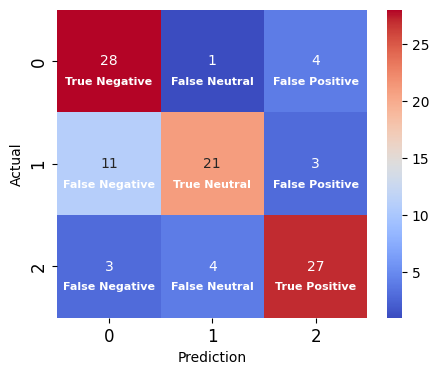

__________________________________________________________

              precision    recall  f1-score   support

     Negatif       0.67      0.85      0.75        33
      Netral       0.81      0.60      0.69        35
     Positif       0.79      0.79      0.79        34

    accuracy                           0.75       102
   macro avg       0.76      0.75      0.74       102
weighted avg       0.76      0.75      0.74       102

__________________________________________________________

Accuracy	:  0.7450980392156863
Precision	:  0.7561588738059326
Recall		:  0.7475341651812241
F1-Score	:  0.7431029679631416




In [152]:
eval(y_test, y_pred)

In [111]:
#skenario 02

vectorizer = TfidfVectorizer(ngram_range=(1, 3))
X = vectorizer.fit_transform(data_modelGanjar['textDisplay_join'])
y = data_modelGanjar['sentimen']

In [112]:
np.random.seed(42)

smote= SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

In [114]:
model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [115]:
y_pred = model.predict(X_test)
print("Test Skenario 80:20")
print(classification_report(y_test, y_pred))

Test Skenario 80:20
              precision    recall  f1-score   support

     Negatif       0.60      0.82      0.69        65
      Netral       0.79      0.59      0.67        70
     Positif       0.81      0.74      0.77        68

    accuracy                           0.71       203
   macro avg       0.73      0.71      0.71       203
weighted avg       0.73      0.71      0.71       203



In [62]:
#skenario 03

vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X = vectorizer.fit_transform(data_modelGanjar['textDisplay_join'])
y = data_modelGanjar['sentimen']

In [63]:
np.random.seed(42)

smote= SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=42)

In [65]:
model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [66]:
y_pred = model.predict(X_test)
print("Test Skenario 70:30")
print(classification_report(y_test, y_pred))

Test Skenario 70:30
              precision    recall  f1-score   support

     Negatif       0.57      0.81      0.67        90
      Netral       0.82      0.58      0.68       107
     Positif       0.81      0.75      0.78       108

    accuracy                           0.71       305
   macro avg       0.73      0.71      0.71       305
weighted avg       0.74      0.71      0.71       305



In [67]:
#skenario 04

vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X = vectorizer.fit_transform(data_modelGanjar['textDisplay_join'])
y = data_modelGanjar['sentimen']

In [68]:
np.random.seed(42)

smote= SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.4, random_state=42)

In [70]:
model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [71]:
y_pred = model.predict(X_test)
print("Test Skenario 60:40")
print(classification_report(y_test, y_pred))

Test Skenario 60:40
              precision    recall  f1-score   support

     Negatif       0.57      0.83      0.68       122
      Netral       0.81      0.59      0.68       135
     Positif       0.85      0.74      0.79       149

    accuracy                           0.72       406
   macro avg       0.74      0.72      0.72       406
weighted avg       0.75      0.72      0.72       406



In [116]:
#skenario 04

vectorizer = TfidfVectorizer(ngram_range=(1, 3))
X = vectorizer.fit_transform(data_modelGanjar['textDisplay_join'])
y = data_modelGanjar['sentimen']

In [117]:
np.random.seed(42)

smote= SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.5, random_state=42)

In [119]:
model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [120]:
y_pred = model.predict(X_test)
print("Test Skenario 60:40")
print(classification_report(y_test, y_pred))

Test Skenario 60:40
              precision    recall  f1-score   support

     Negatif       0.56      0.81      0.66       153
      Netral       0.83      0.62      0.71       170
     Positif       0.82      0.71      0.76       184

    accuracy                           0.71       507
   macro avg       0.74      0.72      0.71       507
weighted avg       0.75      0.71      0.72       507



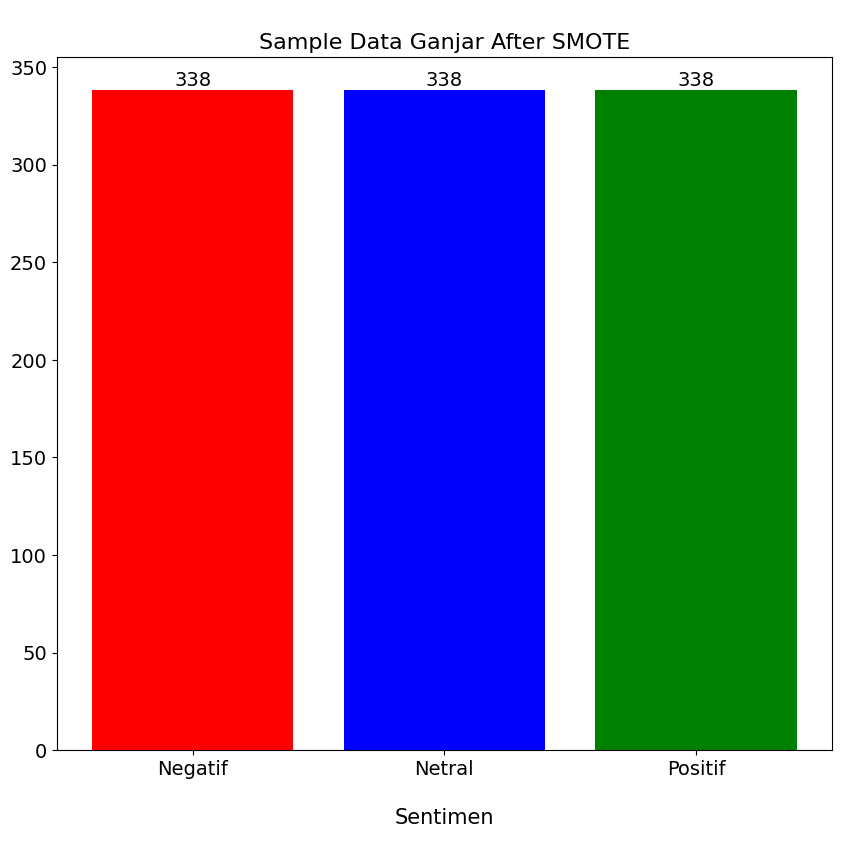

In [77]:
#VISUALIASI AFTER SMOTE
from sklearn.preprocessing import LabelEncoder

#change label to numerik
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_smote)

#setup bar for SMOTE
x = ['Negatif', 'Netral', 'Positif']
y = np.bincount(y_encoded)
fig, ax = plt.subplots(figsize=(10, 9))
ax.bar(x, y, color=('red', 'blue', 'green'))
for bar in ax.patches:
    ax.annotate(str(bar.get_height()), (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center', va='center', size=14, xytext=(0, 7), textcoords='offset points')
plt.title('\nSample Data Ganjar After SMOTE', size=16)
plt.ylim(bottom=0)
plt.xlabel('\nSentimen\n', size=15)
plt.xticks(size=14)
plt.yticks(size=14)
plt.show()


## **Wordcloud**

In [78]:
#definisikan fungsi warna wordcloud

def green_color(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return 'hsl(120, 100%%, %d%%)' % np.random.randint(49, 51)
def blue_color(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return 'hsl(240, 100%%, %d%%)' % np.random.randint(49, 51)
def red_color(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return 'hsl(0, 100%%, %d%%)' % np.random.randint(49, 51)

In [79]:
#import gambar cloud
mask = np.array(Image.open('/content/drive/My Drive/Skripsi/Thesis/Skripsi Saya/text processing/ganjarFile/cloud.jpg'))

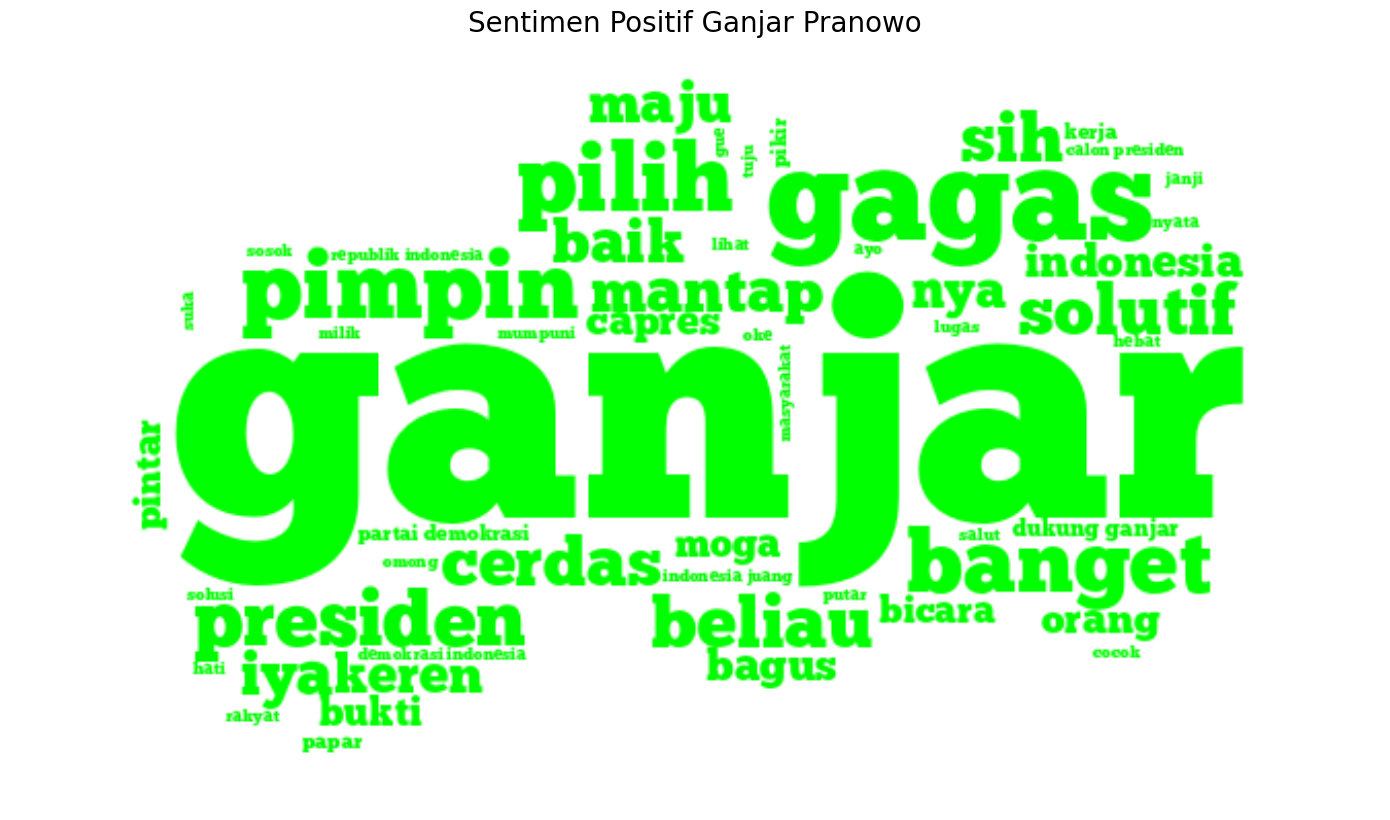

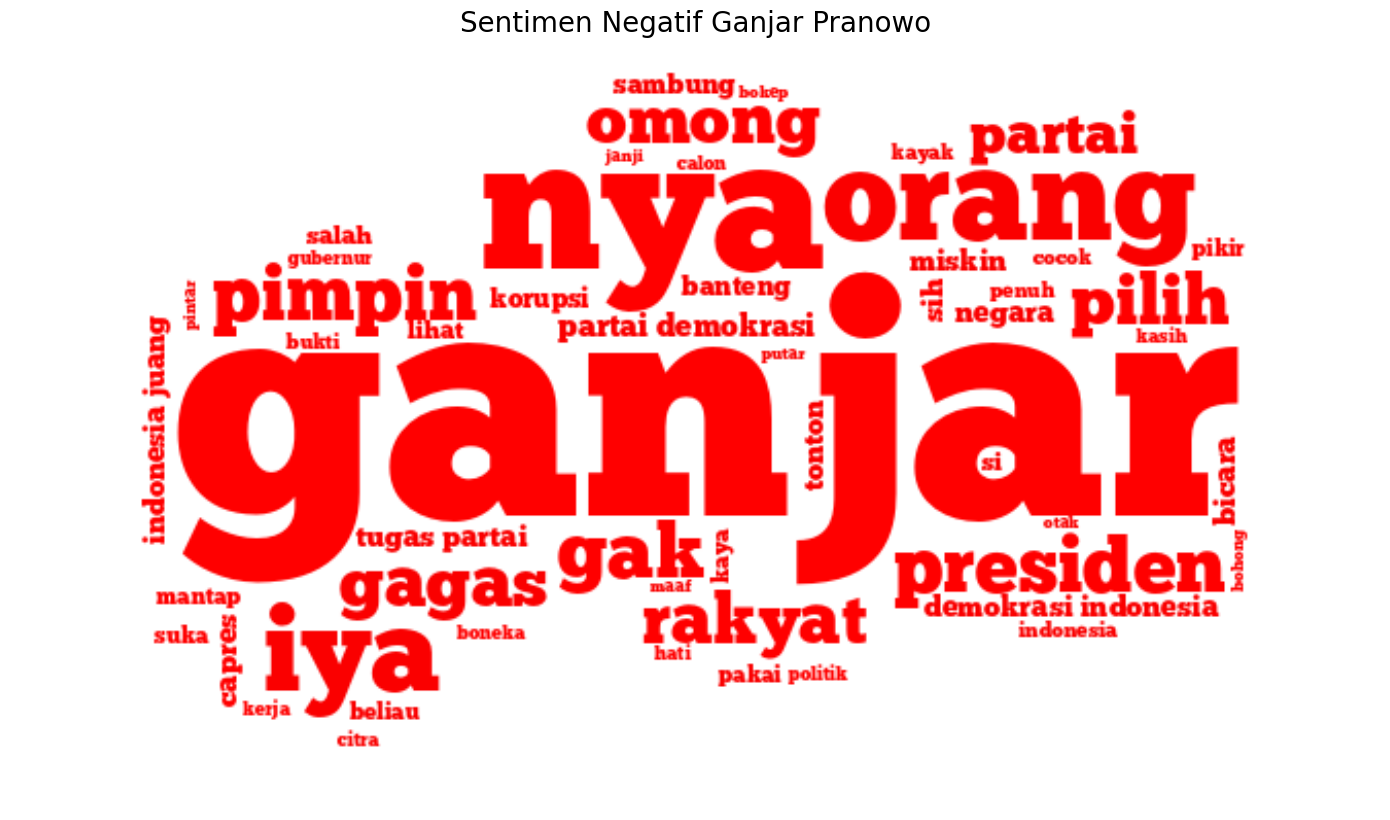

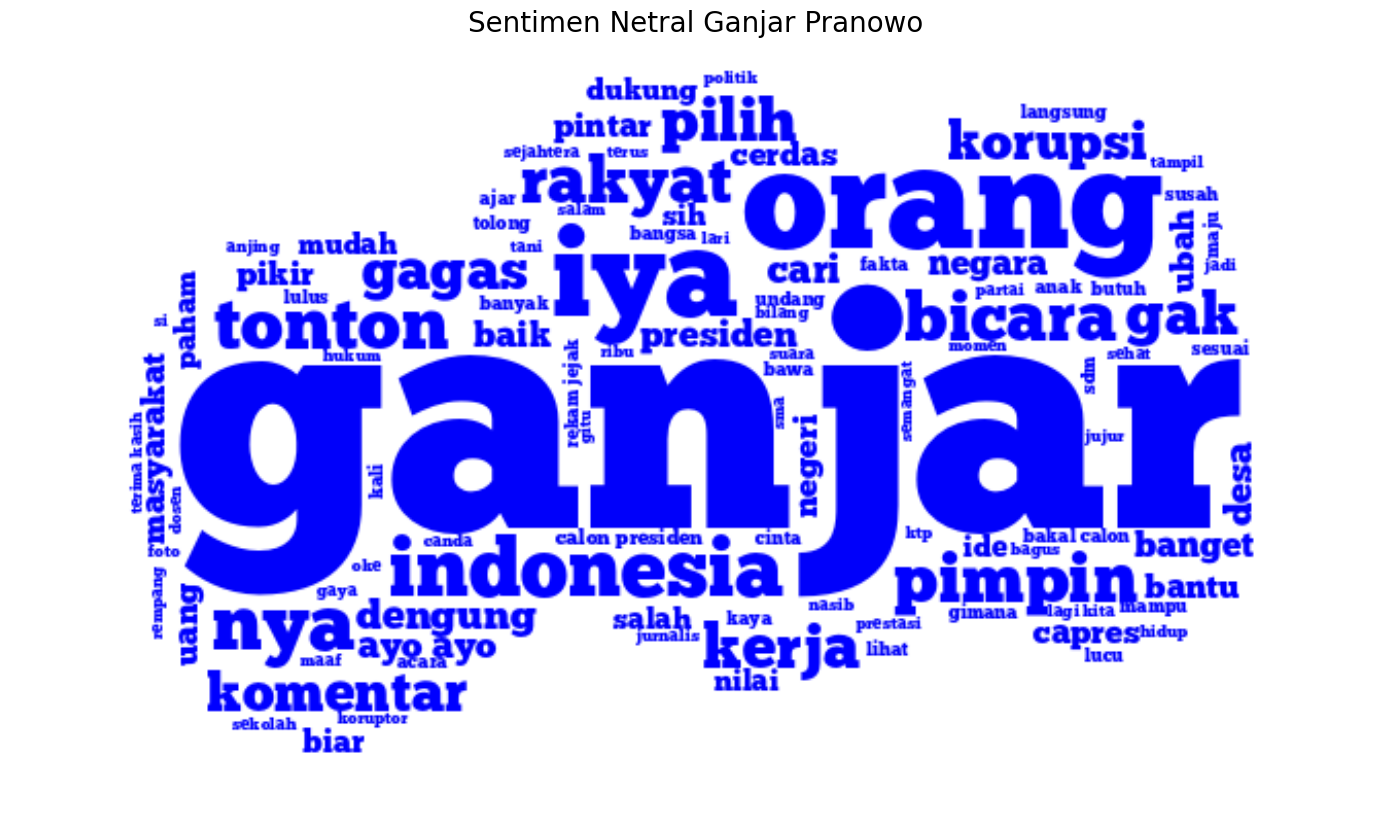

In [80]:
#setup wordcloud

texts_pos = data_modelGanjar[data_modelGanjar['sentimen'] == 'Positif']['textDisplay_join'].astype(str).str.cat(sep=' ')
texts_neg = data_modelGanjar[data_modelGanjar['sentimen'] == 'Negatif']['textDisplay_join'].astype(str).str.cat(sep=' ')
texts_neu = data_modelGanjar[data_modelGanjar['sentimen'] == 'Netral']['textDisplay_join'].astype(str).str.cat(sep=' ')

#setup wordcloud dengan font path, mask, dan fungsi warna kustom
wordcloud_pos = WordCloud(font_path='/content/drive/My Drive/Skripsi/Thesis/Skripsi Saya/text processing/ganjarFile/chunk.otf',
                          mask=mask,
                          background_color='white',
                          max_words=200,
                          min_font_size=8,
                          max_font_size=256,
                          random_state=42,
                          width=mask.shape[1],
                          height=mask.shape[0],
                          stopwords=set(STOPWORDS)).generate(texts_pos)

#setup wordcloud dengan font path, mask, dan fungsi warna kustom
wordcloud_neg = WordCloud(font_path='/content/drive/My Drive/Skripsi/Thesis/Skripsi Saya/text processing/ganjarFile/chunk.otf',
                          mask=mask,
                          background_color='white',
                          max_words=200,
                          min_font_size=8,
                          max_font_size=256,
                          random_state=42,
                          width=mask.shape[1],
                          height=mask.shape[0],
                          stopwords=set(STOPWORDS)).generate(texts_neg)

#setup wordcloud dengan font path, mask, dan fungsi warna kustom
wordcloud_neu = WordCloud(font_path='/content/drive/My Drive/Skripsi/Thesis/Skripsi Saya/text processing/ganjarFile/chunk.otf',
                          mask=mask,
                          background_color='white',
                          max_words=200,
                          min_font_size=8,
                          max_font_size=256,
                          random_state=42,
                          width=mask.shape[1],
                          height=mask.shape[0],
                          stopwords=set(STOPWORDS)).generate(texts_neu)

wordcloud_pos.generate(texts_pos)

plt.figure(figsize=(16, 8))
plt.imshow(wordcloud_pos.recolor(color_func = green_color), interpolation='bilinear')
plt.title('Sentimen Positif Ganjar Pranowo', size=20)
plt.axis('off')
plt.tight_layout(pad=0)

wordcloud_neg.generate(texts_neg)

plt.figure(figsize=(16, 8))
plt.imshow(wordcloud_neg.recolor(color_func = red_color), interpolation='bilinear')
plt.title('Sentimen Negatif Ganjar Pranowo', size=20)
plt.axis('off')
plt.tight_layout(pad=0)

wordcloud_neu.generate(texts_neu)

plt.figure(figsize=(16, 8))
plt.imshow(wordcloud_neu.recolor(color_func = blue_color), interpolation='bilinear')
plt.title('Sentimen Netral Ganjar Pranowo', size=20)
plt.axis('off')
plt.tight_layout(pad=0)

plt.show()